In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

plt.rcParams["figure.figsize"] = (15,9)

In [16]:
def plot_spectrum(fft_spectrum :np.array,f_s:int) -> None:
    n_s = len(fft_spectrum)
    x = np.linspace(0,f_s/2,(n_s//2)+1)
    plt.bar(x, np.abs(fft_spectrum[:(n_s//2)+1]))
    plt.xlabel('Hz')
    plt.ylabel('widmo')
    plt.title('Widmo sygnału')
    plt.show()

In [9]:
#wczytywanie do dataframe
ekg_noise = pd.read_csv("ekg_noise.txt",sep=' ',skipinitialspace=True,header=None,names=["czas","amplituda"])
f_ekg_noise = 1000 #Hz   
ekg_noise.set_index("czas",inplace=True)
ekg_noise

,amplituda
czas,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962
...,...
8.877778,-0.306962
8.880556,-0.316962
8.883333,-0.270000


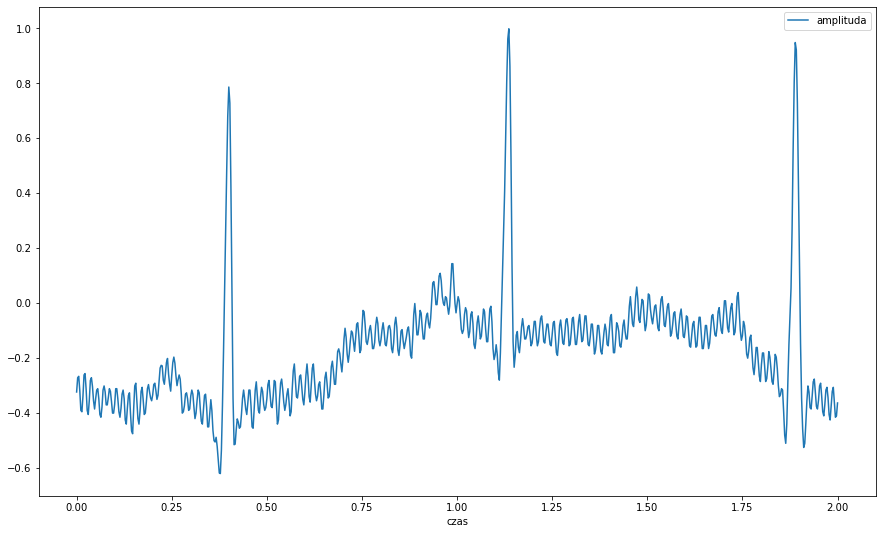

In [15]:
signal_numbers = ekg_noise.columns #[1,2,3,4,5,6,7,8,9,10,11,12]
time_begin = 0 # x.xxx s min 0.000
time_end = 2 # x.xxx s max 10
y_min = None
y_max = None
y_label = "sygnal"
x_min = None
x_max = None
x_label = "Czas"

ekg_noise.loc[time_begin:time_end,signal_numbers].plot(xlim=[x_min,x_max],ylim=[y_min,y_max])

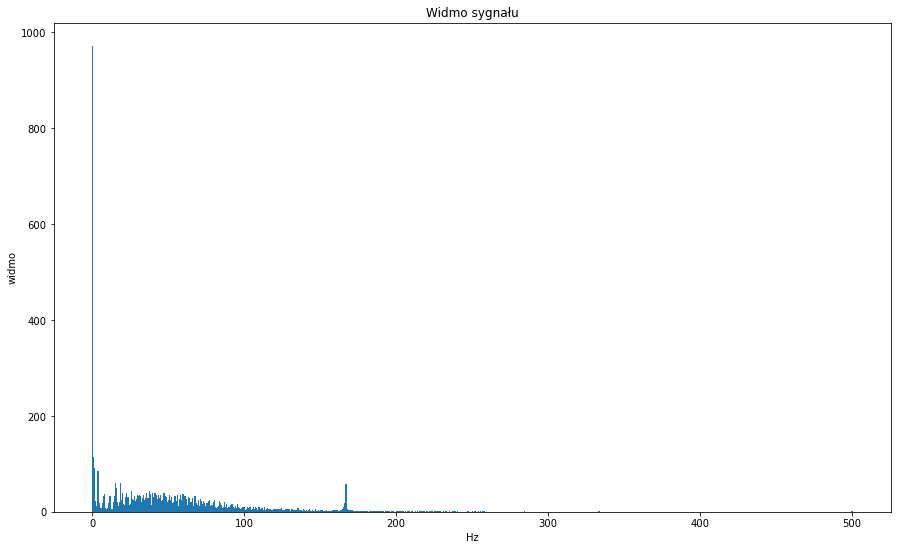

In [17]:
spectrum = np.fft.fft(ekg_noise["amplituda"])
plot_spectrum(spectrum,f_ekg_noise)


